In [1]:
import numpy as np
import matplotlib.pyplot as plt

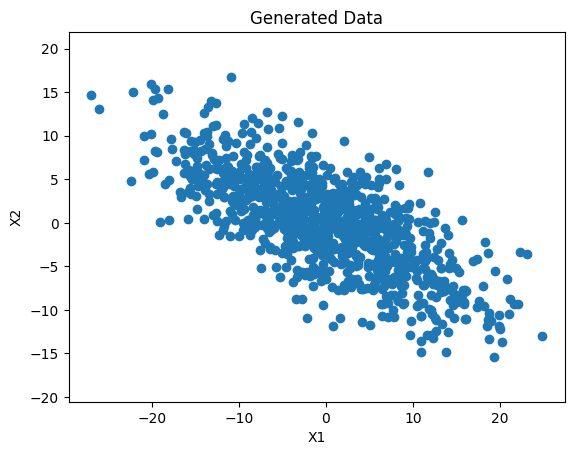

In [7]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)  # For reproducibility

# Number of samples
n_samples = 1000

# Generate correlated Gaussian variables
mean = [0, 0]
cov = [[1, 0.2], [0.2, 3]]  # Reduced correlation
X = np.random.multivariate_normal(mean, cov, n_samples)

# Adjust scaling factors
X[:, 0] *= 10
X[:, 1] /= .5  # Less division to make data "wider"

# Rotate the data
theta = np.radians(30)  # Rotation angle
rotation_matrix = np.array([[np.cos(theta), -np.sin(theta)], [np.sin(theta), np.cos(theta)]])
X = X @ rotation_matrix

# Plot the data
plt.scatter(X[:, 0], X[:, 1])
plt.title('Generated Data')
plt.xlabel('X1')
plt.ylabel('X2')
plt.axis('equal')
plt.show()


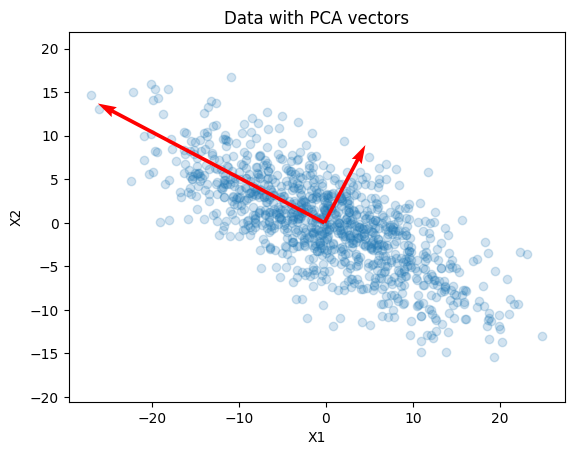

In [8]:
from sklearn.decomposition import PCA

# Apply PCA
pca = PCA(n_components=2)
pca.fit(X)

# Plot the original data
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)

# Plot the PCA vectors (principal components)
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    plt.quiver(pca.mean_[0], pca.mean_[1], v[0], v[1], angles='xy', scale_units='xy', scale=1, color='red')

plt.title('Data with PCA vectors')
plt.xlabel('X1')
plt.ylabel('X2')
plt.axis('equal')
plt.show()


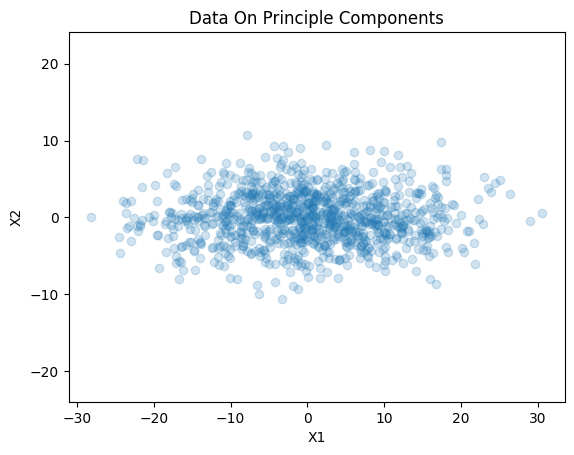

In [9]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Plot the data on the new axes
plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.2)

plt.title('Data On Principle Components')
plt.xlabel('X1')
plt.ylabel('X2')
plt.axis('equal')
plt.show()

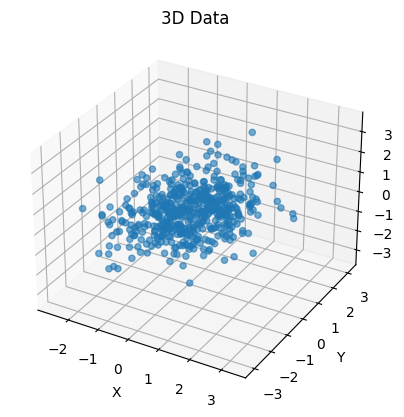

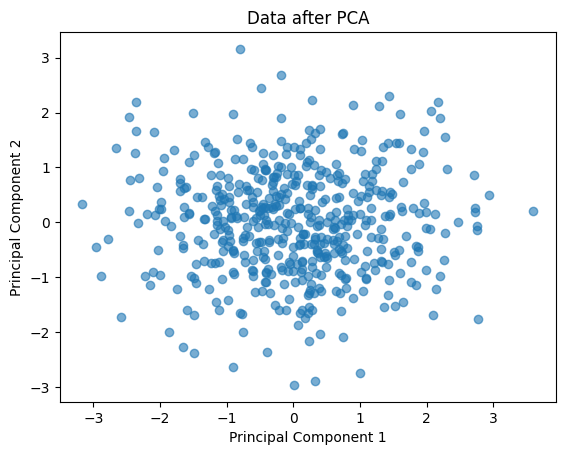

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA

np.random.seed(0)

# Generate random 3D data
n_samples = 500
mean = [0, 0, 0]
cov = [[1, 0.2, 0.3],
       [0.2, 1, 0.1],
       [0.3, 0.1, 1]]
X = np.random.multivariate_normal(mean, cov, n_samples)

# Apply PCA to reduce to 2 dimensions
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Plot 3D data
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], alpha=0.6)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('3D Data')

# Plot 2D data after PCA
plt.figure()
plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.6)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Data after PCA')

plt.show()


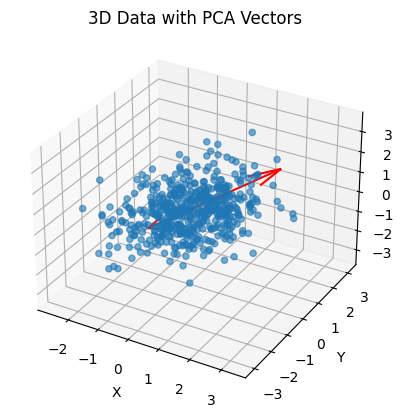

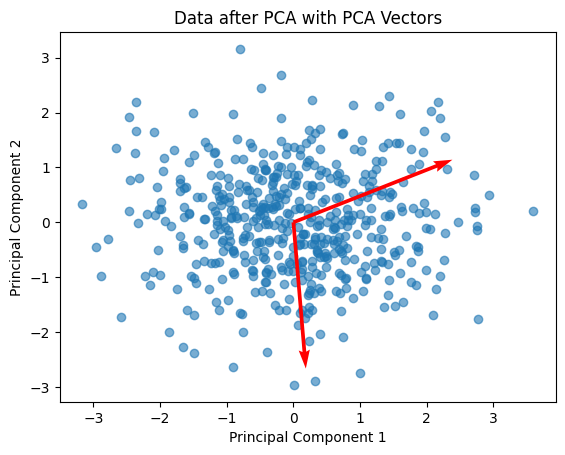

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA

np.random.seed(0)

# Generate random 3D data
n_samples = 500
mean = [0, 0, 0]
cov = [[1, 0.2, 0.3],
       [0.2, 1, 0.1],
       [0.3, 0.1, 1]]
X = np.random.multivariate_normal(mean, cov, n_samples)

# Apply PCA to reduce to 2 dimensions
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Plot 3D data with PCA vectors
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], alpha=0.6)

# Plot PCA vectors in 3D plot
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    ax.quiver(0, 0, 0, v[0], v[1], v[2], color='red')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('3D Data with PCA Vectors')

# Plot 2D data after PCA with PCA vectors
plt.figure()
plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.6)

# Plot PCA vectors in 2D plot
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    plt.quiver(0, 0, v[0], v[1], angles='xy', scale_units='xy', scale=1, color='red')

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Data after PCA with PCA Vectors')

plt.show()


/tmp/ipykernel_23480/131756459.py:21: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('viridis')


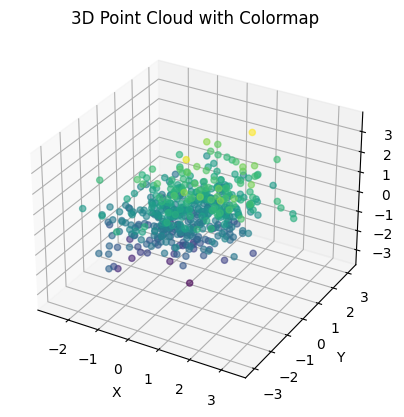

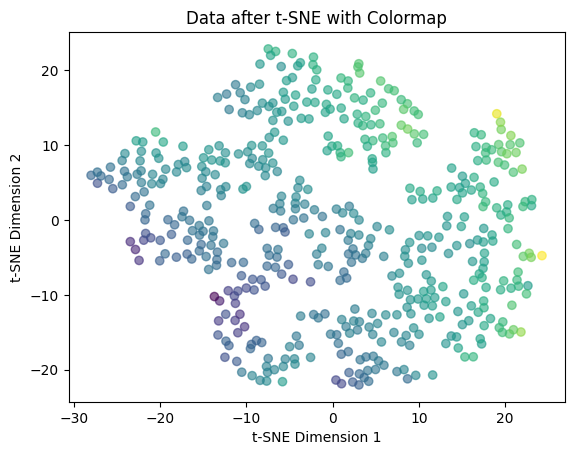

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.manifold import TSNE

np.random.seed(0)

# Generate random 3D data
n_samples = 500
mean = [0, 0, 0]
cov = [[1, 0.2, 0.3],
       [0.2, 1, 0.1],
       [0.3, 0.1, 1]]
X = np.random.multivariate_normal(mean, cov, n_samples)

# Apply t-SNE to reduce to 2 dimensions
tsne = TSNE(n_components=2, random_state=0)
X_tsne = tsne.fit_transform(X)

# Create colormap based on Z-coordinate
cmap = plt.cm.get_cmap('viridis')

# Plot 3D point cloud with colormap
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=X[:, 2], cmap=cmap, alpha=0.6)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('3D Point Cloud with Colormap')

# Plot 2D data after t-SNE with colormap
plt.figure()
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=X[:, 2], cmap=cmap, alpha=0.6)
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.title('Data after t-SNE with Colormap')

plt.show()
